## Importing Dependecies


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics #used to find accuracy of model

## Data collecting and Processing

In [6]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('carData.csv')

In [7]:
#inspecting the first 5 rows 
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
#checking how many rows and columns
car_dataset.shape

(301, 9)

In [9]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Encoding the Categorical Data

In [22]:
#encoding "Fuel_Type" column
#there would be a warning, for now ignore it
car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#encoding "Seller_Type" column
car_dataset.replace({'Seller_Type': {'Dealer':0,'Individual':1}},inplace=True)
#encoding "Transmission" column
car_dataset.replace({'Transmission': {'Manual':0,'Automatic':1}},inplace=True)

In [15]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the dataset into Training Data and Target

In [16]:
#selling price is target and we arte not using car name for prtediction if cloumn axis=1 if row x=0
#independent factors
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)  
#dependent factor / target
Y = car_dataset['Selling_Price']


In [17]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting Training and Test Data

In [19]:
# the random_state parameter is used to control the shuffling of the data before splitting it into training and testing sets. 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# Model Training

## 1. Linear Regression

In [20]:
#loading the Linear Regression Model
model = LinearRegression()

In [47]:
#training the linear regression model
model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [23]:
#Prediction on training data
TrainingDataPrediction = model.predict(X_train)

In [29]:
#R-squared is a statistical measure used in machine learning to evaluate the goodness of fit of a regression model.
#R square error
error_score = metrics.r2_score(Y_train,TrainingDataPrediction)
print("R squared error: ", error_score)

R squared error:  0.8838169193709792


In [30]:
#way to check model score
model.score(X_test,Y_test)

0.8401532365378521

### Visualize the actual prices and predicted prices

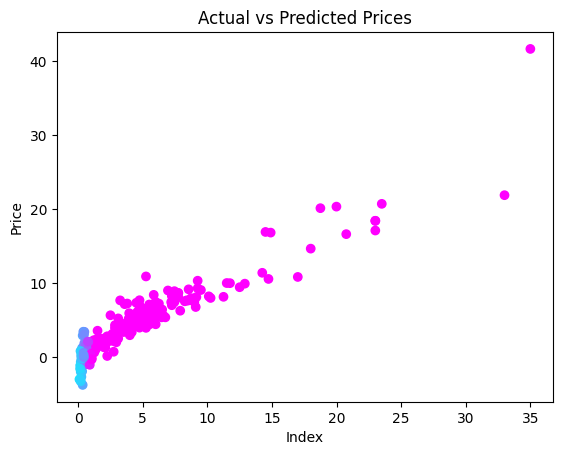

In [42]:
# Create colormap based on x-axis values
colors = plt.cm.cool(Y_train) #blue color

plt.scatter(Y_train,TrainingDataPrediction,c=colors)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')

# Display the plot
plt.show()       

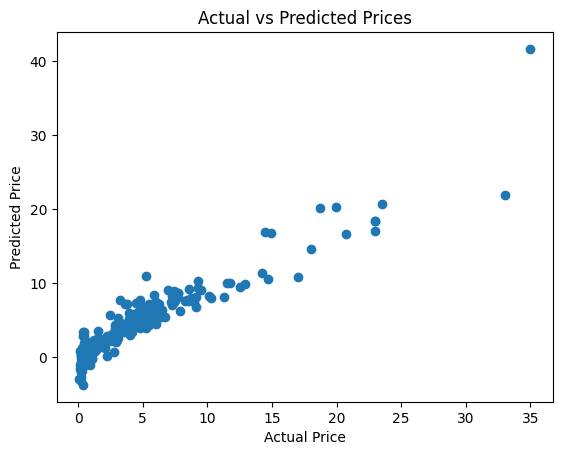

In [41]:
plt.scatter(Y_train,TrainingDataPrediction,)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [43]:
#Prediction on training data
TestDataPrediction = model.predict(X_test)

In [45]:
#R square error
error_score = metrics.r2_score(Y_test,TestDataPrediction)
print("R squared error: ", error_score)

R squared error:  0.8401532365378521


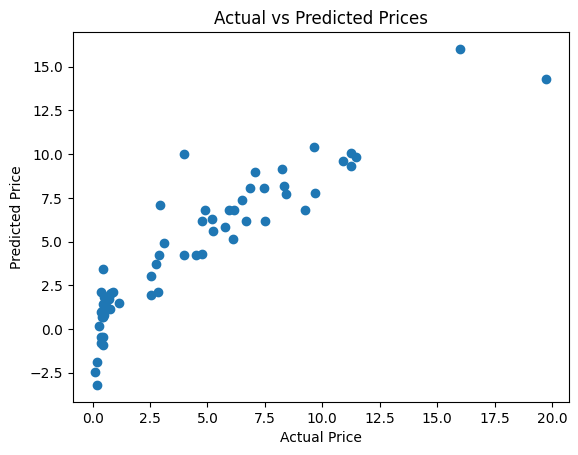

In [46]:
plt.scatter(Y_test,TestDataPrediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

## 2. Lasso 

In [49]:
#loading the Linear Regression Model
LassoModel = Lasso()

In [50]:
#training the lasso model
LassoModel.fit(X_train,Y_train)

Lasso()

In [51]:
LassoModel.score(X_test,Y_test)

0.8497457570738539

### Model Evaluation

In [52]:
#Prediction on training data
LassoTrainingDataPrediction = LassoModel.predict(X_train)

In [54]:
#R square error
error_score_Lasso = metrics.r2_score(Y_train,LassoTrainingDataPrediction)
print("R squared error: ", error_score_Lasso)

R squared error:  0.843587395258283


### Visualization

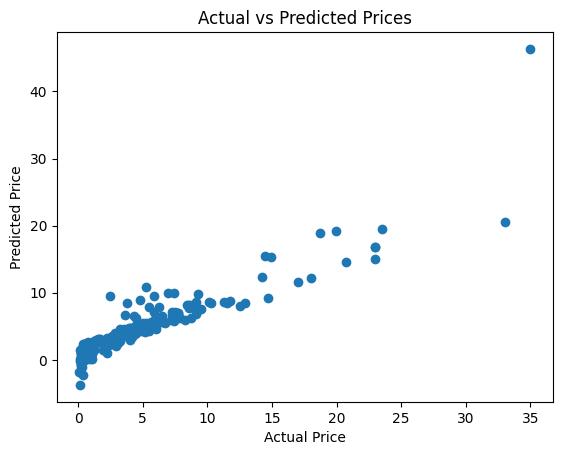

In [55]:
plt.scatter(Y_train,LassoTrainingDataPrediction,)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()